## <버스 내 체류시간 분석>
- 기준일 및 시간대별 버스내 체류시간(분) 분석비교
- 시간 및 승객구분별 빈도분석 비교

## 파일 불러오기

In [1]:
import pandas as pd

In [2]:
df_total = pd.DataFrame()
for i in range(1, 81, 1):
    file_path = './포항/trfcard({})/trfcard.csv'.format(i)
    df = pd.read_csv(file_path, encoding='utf-8')
    df_total = pd.concat([df_total, df])

In [3]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842608 entries, 0 to 4982
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   on_date      842608 non-null  int64  
 1   off_date     842608 non-null  int64  
 2   route_name   842608 non-null  object 
 3   descr        842608 non-null  object 
 4   age_type     842608 non-null  object 
 5   trans_yn     842608 non-null  object 
 6   addfee_yn    842608 non-null  object 
 7   start_bstop  842608 non-null  object 
 8   start_gps_x  842608 non-null  float64
 9   start_gps_y  842608 non-null  float64
 10  end_bstop    842608 non-null  object 
 11  end_gps_x    842608 non-null  float64
 12  end_gps_y    842608 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 90.0+ MB


In [4]:
col_name = pd.read_excel('./포항/컬럼명.xlsx', header=11)
col_name

,컬럼명(한글),컬럼명(영문),컬럼 설명,데이터 타입,코드값 여부,코드 테이블,비고
0,승차시각,on_date,승차시각,datetime,N,NaN,NaN
1,하차시각,off_date,하차시각,datetime,N,NaN,NaN
2,노선명,route_name,노선명,varchar,N,NaN,NaN
3,노선설명,descr,노선설명,varchar,N,NaN,NaN
4,승객연령,age_type,승객연령,varchar,N,NaN,NaN
5,환승여부,trans_yn,환승여부,varchar,N,NaN,NaN
6,추가운임여부,addfee_yn,추가운임여부,varchar,N,NaN,NaN
7,승차정류장,start_bstop,승차정류장,varchar,N,NaN,NaN
8,승차정류장 GPS X,start_gps_x,승차정류장 GPS X,numeric,N,NaN,NaN
9,승차정류장 GPS Y,start_gps_y,승차정류장 GPS Y,numeric,N,NaN,NaN


In [5]:
kor_col = []
for j in range (len(col_name)):
    kor_col.append(col_name['컬럼명(한글)'][j])
print(kor_col)

['승차시각', '하차시각', '노선명', '노선설명', '승객연령', '환승여부', '추가운임여부', '승차정류장', '승차정류장 GPS X', '승차정류장 GPS Y', '하차정류장', '하차정류장 GPS X', '하차정류장 GPS Y']


In [6]:
df_total.columns = kor_col
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842608 entries, 0 to 4982
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   승차시각         842608 non-null  int64  
 1   하차시각         842608 non-null  int64  
 2   노선명          842608 non-null  object 
 3   노선설명         842608 non-null  object 
 4   승객연령         842608 non-null  object 
 5   환승여부         842608 non-null  object 
 6   추가운임여부       842608 non-null  object 
 7   승차정류장        842608 non-null  object 
 8   승차정류장 GPS X  842608 non-null  float64
 9   승차정류장 GPS Y  842608 non-null  float64
 10  하차정류장        842608 non-null  object 
 11  하차정류장 GPS X  842608 non-null  float64
 12  하차정류장 GPS Y  842608 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 90.0+ MB


In [7]:
df_total

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,20200327232513,20200327232800,101,양덕-고속터미널-동해,일반,Y,N,포은중앙도서관,129.367873,36.043187,롯데아파트,129.377403,36.056943
4979,20200327232740,20200327233319,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,우현경로당,129.362232,36.049878
4980,20200327232829,20200327233446,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,시외버스터미널,129.350290,36.013280,연일파출소,129.345750,35.997470
4981,20200327233328,20200327233442,107,문덕-시외(고속)터미널-흥해,일반,N,N,우현경로당,129.362232,36.049878,도심환승센터,129.365165,36.043435


In [8]:
df_total['승차시각'] = df_total['승차시각'].astype(str)
df_total['하차시각'] = df_total['하차시각'].astype(str)

In [9]:
df_total['년(승차)'] = df_total['승차시각'].str[:4]
df_total['월(승차)'] = df_total['승차시각'].str[4:6]
df_total['일(승차)'] = df_total['승차시각'].str[6:8]
df_total['시(승차)'] = df_total['승차시각'].str[8:10]
df_total['분(승차)'] = df_total['승차시각'].str[10:12]
df_total['초(승차)'] = df_total['승차시각'].str[12:]

df_total['년(하차)'] = df_total['하차시각'].str[:4]
df_total['월(하차)'] = df_total['하차시각'].str[4:6]
df_total['일(하차)'] = df_total['하차시각'].str[6:8]
df_total['시(하차)'] = df_total['하차시각'].str[8:10]
df_total['분(하차)'] = df_total['하차시각'].str[10:12]
df_total['초(하차)'] = df_total['하차시각'].str[12:]

In [10]:
df_total

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,...,일(승차),시(승차),분(승차),초(승차),년(하차),월(하차),일(하차),시(하차),분(하차),초(하차)
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,...,02,05,10,49,2020,01,02,05,18,44
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,...,02,05,13,38,2020,01,02,05,45,49
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,...,02,05,15,49,2020,01,02,05,19,30
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,...,02,05,16,17,2020,01,02,05,50,46
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,...,02,05,18,41,2020,01,02,05,23,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,20200327232513,20200327232800,101,양덕-고속터미널-동해,일반,Y,N,포은중앙도서관,129.367873,36.043187,...,27,23,25,13,2020,03,27,23,28,00
4979,20200327232740,20200327233319,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,...,27,23,27,40,2020,03,27,23,33,19
4980,20200327232829,20200327233446,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,시외버스터미널,129.350290,36.013280,...,27,23,28,29,2020,03,27,23,34,46
4981,20200327233328,20200327233442,107,문덕-시외(고속)터미널-흥해,일반,N,N,우현경로당,129.362232,36.049878,...,27,23,33,28,2020,03,27,23,34,42


In [11]:
df_total['승차시각'] = df_total['승차시각'].astype(str)
df_total['하차시각'] = df_total['하차시각'].astype(str)

In [12]:
df_total['소요시간'] = pd.to_datetime(df_total['하차시각']) - pd.to_datetime(df_total['승차시각'])
df_total.head()

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,...,시(승차),분(승차),초(승차),년(하차),월(하차),일(하차),시(하차),분(하차),초(하차),소요시간
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,...,05,10,49,2020,01,02,05,18,44,0 days 00:07:55
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,...,05,13,38,2020,01,02,05,45,49,0 days 00:32:11
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,...,05,15,49,2020,01,02,05,19,30,0 days 00:03:41
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,...,05,16,17,2020,01,02,05,50,46,0 days 00:34:29
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,...,05,18,41,2020,01,02,05,23,10,0 days 00:04:29


In [303]:
df_total = df_total.astype('str')

In [304]:
df_total['년(승차)'] = df_total['승차시각'].str[:4]
df_total['월(승차)'] = df_total['승차시각'].str[4:6]
df_total['일(승차)'] = df_total['승차시각'].str[6:8]
df_total['시(승차)'] = df_total['승차시각'].str[8:10]
df_total['분(승차)'] = df_total['승차시각'].str[10:12]
df_total['초(승차)'] = df_total['승차시각'].str[12:]

df_total['년(하차)'] = df_total['하차시각'].str[:4]
df_total['월(하차)'] = df_total['하차시각'].str[4:6]
df_total['일(하차)'] = df_total['하차시각'].str[6:8]
df_total['시(하차)'] = df_total['하차시각'].str[8:10]
df_total['분(하차)'] = df_total['하차시각'].str[10:12]
df_total['초(하차)'] = df_total['하차시각'].str[12:]

In [305]:
df_total

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,...,일(승차),시(승차),분(승차),초(승차),년(하차),월(하차),일(하차),시(하차),분(하차),초(하차)
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,...,02,05,10,49,2020,01,02,05,18,44
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,...,02,05,13,38,2020,01,02,05,45,49
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,...,02,05,15,49,2020,01,02,05,19,30
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.40252,35.973038,...,02,05,16,17,2020,01,02,05,50,46
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,...,02,05,18,41,2020,01,02,05,23,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,20200328232420,20200328232628,200,양덕-남구청(야구장)-구룡포,일반,N,N,형산로터리,129.36847,36.01163,...,28,23,24,20,2020,03,28,23,26,28
3871,20200328232523,20200328233525,130,양덕-장량지구-양학-시청-송도-장량지구-양덕,일반,N,N,북구보건소,129.379384,36.07079,...,28,23,25,23,2020,03,28,23,35,25
3872,20200328232554,20200328233435,160,문덕-대송-송도-죽도-용흥,일반,N,N,북구청,129.367128,36.041941,...,28,23,25,54,2020,03,28,23,34,35
3873,20200328232722,20200328235259,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,...,28,23,27,22,2020,03,28,23,52,59


## 소요시간

In [13]:
# 소요시간
df_total['승차시각'] = df_total['승차시각'].astype(str)
df_total['하차시각'] = df_total['하차시각'].astype(str)

df_total['소요시간'] = pd.to_datetime(df_total['하차시각']) - pd.to_datetime(df_total['승차시각'])
df_total.head()

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,...,시(승차),분(승차),초(승차),년(하차),월(하차),일(하차),시(하차),분(하차),초(하차),소요시간
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,...,05,10,49,2020,01,02,05,18,44,0 days 00:07:55
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,...,05,13,38,2020,01,02,05,45,49,0 days 00:32:11
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,...,05,15,49,2020,01,02,05,19,30,0 days 00:03:41
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,...,05,16,17,2020,01,02,05,50,46,0 days 00:34:29
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,...,05,18,41,2020,01,02,05,23,10,0 days 00:04:29


## 결측치 확인, 제거

In [14]:
df_total = df_total.copy()
df_total.head(1)

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,...,시(승차),분(승차),초(승차),년(하차),월(하차),일(하차),시(하차),분(하차),초(하차),소요시간
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,...,05,10,49,2020,01,02,05,18,44,0 days 00:07:55


In [15]:
df_total['시(승차)'] = df_total['시(승차)'].astype(int)
df_total['분(승차)'] = df_total['분(승차)'].astype(int)
df_total['체류시간(분)'] = df_total['시(승차)'] * 60 + df_total['분(승차)']
df_total

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,...,분(승차),초(승차),년(하차),월(하차),일(하차),시(하차),분(하차),초(하차),소요시간,체류시간(분)
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,...,10,49,2020,01,02,05,18,44,0 days 00:07:55,310
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,...,13,38,2020,01,02,05,45,49,0 days 00:32:11,313
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,...,15,49,2020,01,02,05,19,30,0 days 00:03:41,315
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,...,16,17,2020,01,02,05,50,46,0 days 00:34:29,316
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,...,18,41,2020,01,02,05,23,10,0 days 00:04:29,318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,20200327232513,20200327232800,101,양덕-고속터미널-동해,일반,Y,N,포은중앙도서관,129.367873,36.043187,...,25,13,2020,03,27,23,28,00,0 days 00:02:47,1405
4979,20200327232740,20200327233319,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,...,27,40,2020,03,27,23,33,19,0 days 00:05:39,1407
4980,20200327232829,20200327233446,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,시외버스터미널,129.350290,36.013280,...,28,29,2020,03,27,23,34,46,0 days 00:06:17,1408
4981,20200327233328,20200327233442,107,문덕-시외(고속)터미널-흥해,일반,N,N,우현경로당,129.362232,36.049878,...,33,28,2020,03,27,23,34,42,0 days 00:01:14,1413


In [16]:
df_total_pivot = df_total.pivot_table(values = '체류시간(분)',
                                      index = '일(승차)',
                                      columns = '시(승차)',
                                      aggfunc = 'sum')
                                      

In [17]:
df_total_pivot

시(승차),0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
일(승차),,,,,,,,,,,,,,,,,,,,
01,NaN,73749.0,240040.0,398478.0,723140.0,791485.0,959978.0,1153699.0,1357199.0,1456058.0,1587174.0,1751359.0,1649585.0,1786680.0,1636338.0,1300764.0,1168001.0,1128127.0,834147.0,191215.0
02,NaN,68432.0,268118.0,645865.0,1072970.0,1218065.0,1334641.0,1586310.0,1721025.0,1959259.0,2100081.0,2355888.0,2271577.0,2350219.0,2089613.0,1403196.0,1332274.0,1299973.0,1024701.0,210311.0
03,NaN,96346.0,350438.0,901606.0,1340077.0,1493983.0,1684670.0,1922495.0,2023254.0,2375676.0,2529410.0,2866004.0,2890534.0,2857998.0,2659717.0,1618683.0,1388098.0,1405378.0,1078639.0,248130.0
04,NaN,89154.0,356883.0,814809.0,1143966.0,1264301.0,1493027.0,1698653.0,1985039.0,2107521.0,2191044.0,2456184.0,2608537.0,2635815.0,2211362.0,1430269.0,1334359.0,1307790.0,958064.0,218704.0
05,NaN,82323.0,298341.0,650930.0,977968.0,1115801.0,1287945.0,1474957.0,1679562.0,1891455.0,2052457.0,2281943.0,2285739.0,2323691.0,2094441.0,1357275.0,1262746.0,1284532.0,879373.0,149247.0
06,NaN,92984.0,377347.0,934562.0,1363323.0,1490564.0,1528231.0,1846446.0,1956066.0,2223271.0,2516231.0,2656843.0,2614892.0,2619498.0,2290825.0,1416200.0,1270460.0,1160686.0,967549.0,203418.0
07,NaN,80398.0,323558.0,764784.0,1168925.0,1318183.0,1439908.0,1634715.0,1731075.0,1920160.0,2183333.0,2329836.0,2421483.0,2526710.0,2267853.0,1454971.0,1296053.0,1328667.0,975030.0,198218.0
08,NaN,72805.0,252495.0,605945.0,945188.0,1068103.0,1251452.0,1503806.0,1689453.0,1860695.0,2054332.0,2222610.0,2243482.0,2348959.0,2150259.0,1383363.0,1318712.0,1321193.0,971439.0,211992.0
09,NaN,80570.0,281661.0,697159.0,1039615.0,1230909.0,1363010.0,1552589.0,1774522.0,1976563.0,2191599.0,2419913.0,2410813.0,2410099.0,2214155.0,1423199.0,1371599.0,1355867.0,890595.0,218888.0


## 시각화1

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

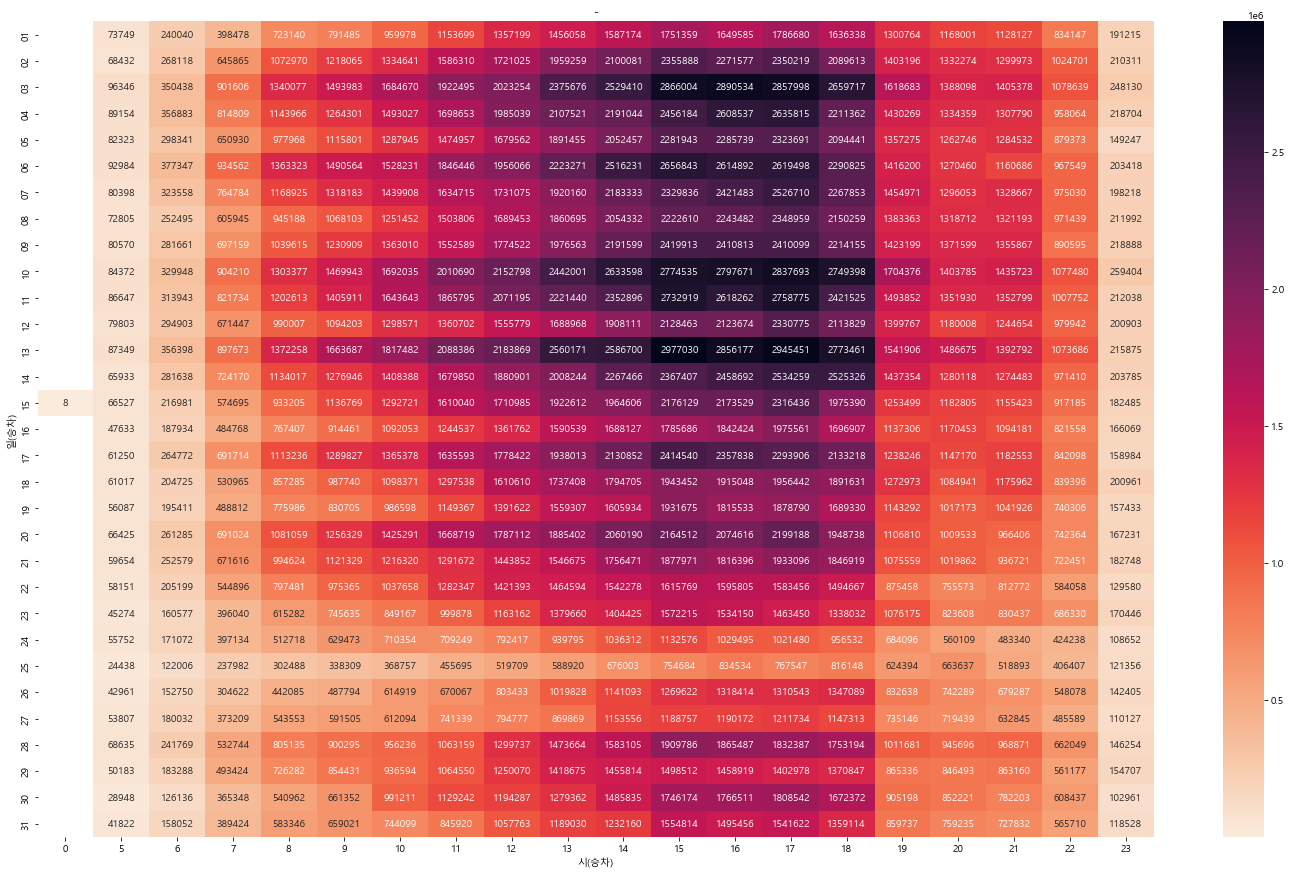

In [22]:
plt.figure(figsize=(25,15))
plt.rc("font", family = "Malgun Gothic", size=10)
sns.heatmap(df_total_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("-")
plt.show()

'''\
주제 : 기준일 및 시간대별 버스내 체류시간(분) 분석비교\
15시에서 18시 사이에 체류시간이 가장 많다\
0시에도 극히 적지만 이용자가 있다\
1시~4시 사이에는 버스 운행을 하지 않아 체류시간이 없다\
'''

## 시각화2

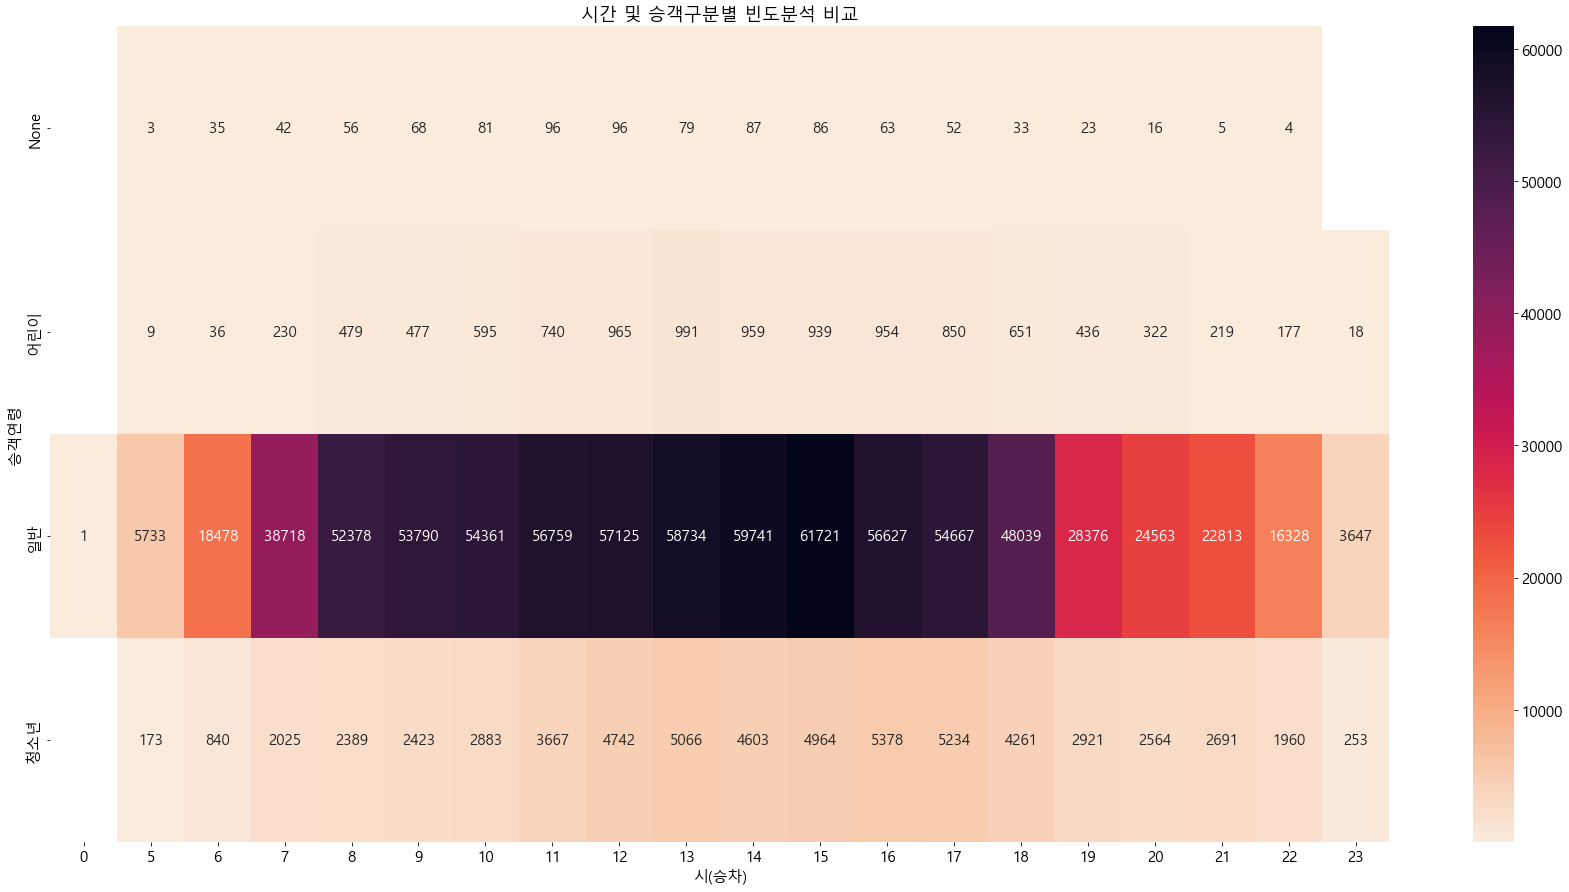

In [24]:
df_total_fre=df_total.pivot_table(index = '승객연령',columns='시(승차)',values = '승차시각', aggfunc='count')
df_total_fre.fillna(0)

plt.rc('font', family = 'Malgun Gothic', size = 15)
plt.figure(figsize=(30,15))
sns.heatmap(df_total_fre, annot = True, fmt='.0f', cmap='rocket_r')
plt.title('시간 및 승객구분별 빈도분석 비교')
plt.show()

'''\
주제 : 시간 및 승객구분별 빈도분석 비교\
일반 이용자가 가장 많다\
None값은 노인으로 추정된다\
일반-청소년-어린이-노인 순으로 이용자가 많다
'''